In [189]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from math import sqrt
import random as rd
import scipy.stats as st
import matplotlib.pyplot as plt

In [168]:
Z90 = 1.645 # 90%
Z95 = 1.96 # 95%
Z99 = 2.58 # 99%

In [4]:
df = pd.read_csv("../BankChurners.csv")

In [16]:
mu_age = df['Customer_Age'].mean()
std_age = df['Customer_Age'].std()

se_age = std_age / sqrt(len(df['Customer_Age']))

me_age = se_age*z

ci_age = (mu_age - me_age, mu_age + me_age)

print(ci_age)

(46.16981911746589, 46.482101490809015)


In [198]:
def ci(data, z, n):
    xb = sum(sample)/n
    std = np.std(data)
    se = std / sqrt(n)
    me = se*z
    # print(me)
    return (xb-me, xb+me)

def me(data, z, n):
    xb = sum(sample)/n
    std = np.std(data)
    se = std / sqrt(n)
    return se*z

def alpha(percent):
    return 1 - (percent/100)
    

In [249]:
def inRange(r1, x):
    return x <= r1[1] and x >= r1[0]

data = df['Total_Trans_Ct']
mu_data = data.mean()
inRangeCount = 0
plotData_x = []
plotData_y = []
plotData_e = []
N = 100
NS = 200
for i in range(NS):
    sample = rd.sample(list(data), N)
    if inRange(ci(sample, Z99, N), mu_data):
        inRangeCount += 1
    plotData_x.append(sum(sample)/len(sample))
    plotData_y.append(1+i)
    plotData_e.append(me(sample, Z99, N))
print((inRangeCount/NS)*100)



99.0


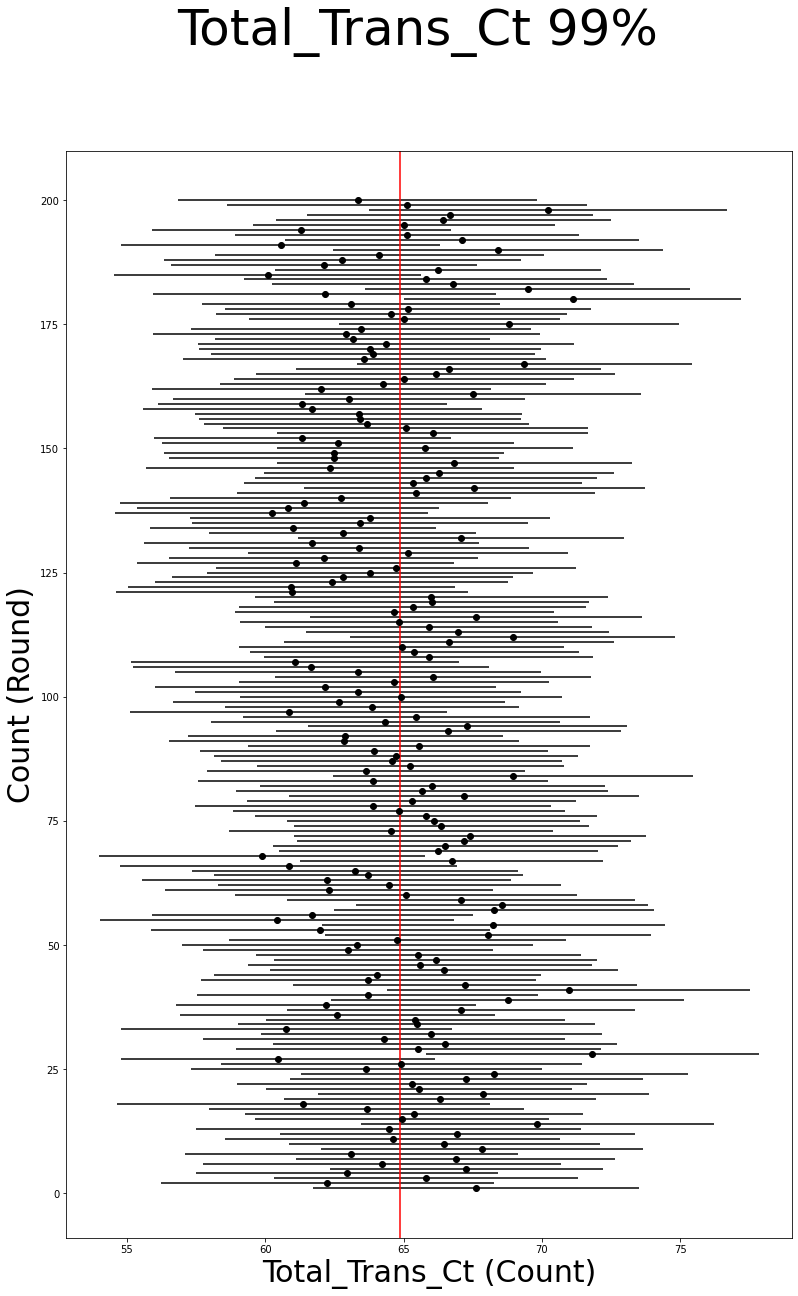

In [250]:
import matplotlib.pyplot as plt

plt.figure(figsize=(13, 20))
plt.suptitle("Total_Trans_Ct 99%", fontsize=50)
plt.xlabel('Total_Trans_Ct (Count)', fontsize=30)
plt.ylabel('Count (Round)', fontsize=30)
plt.errorbar(plotData_x, plotData_y, xerr=plotData_e, fmt = 'o', color = 'k')
# plt.yticks((0, 1, 3, 5, 6), ('', 'x3', 'x2', 'x1','')) 
plt.axvline(x=data.mean(), color='r', linestyle='-')
plt.show()